# <font color='#d50283'>IT Academy - Data Science</font>
##  S09 T02: Aprenentatge Supervisat - Regressions
### Luis Ortas


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn import set_config
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.base import clone

import time
from tabulate import tabulate
from tqdm.notebook import tqdm
from functools import partial
from tempfile import mkdtemp
from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DelayedFlights.csv",index_col=0)
df.head(5)

D:\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1936758.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,1936758.0,6.111106,3.482546,1.0,3.0,6.0,9.0,12.0
DayofMonth,1936758.0,15.753470,8.776272,1.0,8.0,16.0,23.0,31.0
DayOfWeek,1936758.0,3.984827,1.995966,1.0,2.0,4.0,6.0,7.0
DepTime,1936758.0,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,1467.472644,424.766800,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1929648.0,1610.140629,548.178143,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,1936758.0,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,2400.0
FlightNum,1936758.0,2184.263236,1944.702250,1.0,610.0,1543.0,3422.0,9742.0
ActualElapsedTime,1928371.0,133.305863,72.060069,14.0,80.0,116.0,165.0,1114.0


In [5]:
df[['Cancelled','Diverted']] = df[['Cancelled','Diverted']].astype('bool')
#Eliminamos las filas donde Cancelled and diverted son verdad ya que ArrDelay es Nan.
# Eliminamos las columnas Canceled y Diverted.

df.drop(df[df.Cancelled  | df.Diverted].index, inplace=True)
df.drop(columns=['Cancelled', 'CancellationCode', 'Diverted'], inplace=True)

In [6]:
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

En un primer momento trabajaremos con las columnas numéricas.

In [7]:
df_num=df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',  'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','ArrDelay']].copy()

In [8]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 7009727
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   ActualElapsedTime  float64
 8   CRSElapsedTime     float64
 9   AirTime            float64
 10  DepDelay           float64
 11  Distance           int64  
 12  TaxiIn             float64
 13  TaxiOut            float64
 14  CarrierDelay       float64
 15  WeatherDelay       float64
 16  NASDelay           float64
 17  SecurityDelay      float64
 18  LateAircraftDelay  float64
 19  ArrDelay           float64
dtypes: float64(14), int64(6)
memory usage: 309.0 MB


In [9]:
cat_columns = [ 'Tailnum','UniqueCarrier', 'Dest', 'Origin']

**Sustituimos valores nulos por por mediana.**

In [10]:
for i in df_num.columns:
    df_num[i].fillna(df_num[i].median(), inplace = True)
    
df_num.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
ArrDelay             0
dtype: int64

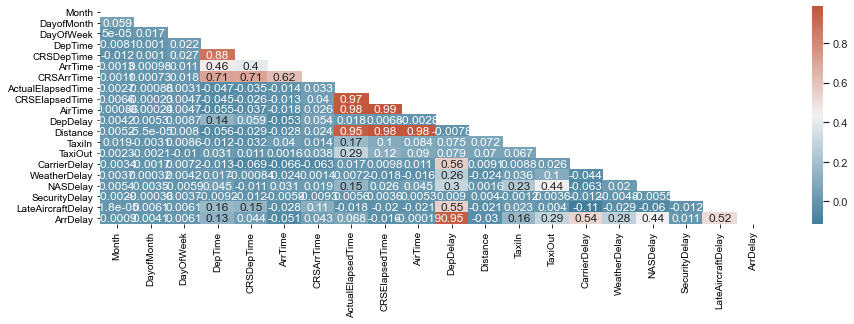

In [11]:
#Heat map correlación
fig,ax = plt.subplots(figsize=(15,4))
corr = df_num.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

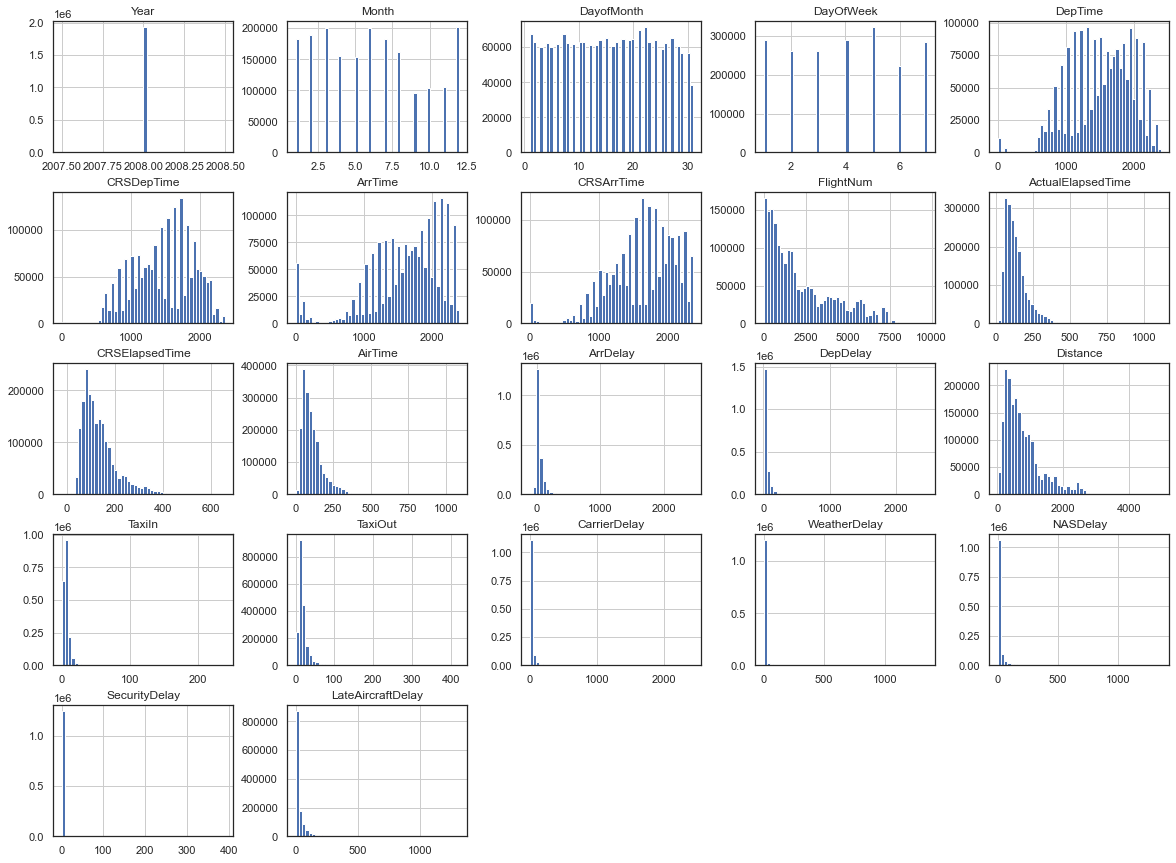

In [12]:
df.hist(bins=50,figsize=(20,15))
plt.show()

#### No eliminamos columnas ya que lo realizaremos dentro de los mismos ejercicios.

***
## Exercici 1
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

**En este punto del ejercicio no realizaremos normalizaciones ni estandarificaciones. Lo realizaremos posteriormente.**

In [13]:
# Relizamos particiones del df.(trabajos con las variables numéricas.)

y=df_num['ArrDelay'] # es la columna objetivo.
X=df_num.drop(columns=['ArrDelay']).copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- **Regresión lineal**

In [14]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [15]:
X1=np.array(X_test)
y1=np.array(y_test)
import statsmodels.api as sm
X_addC = sm.add_constant(X1)
result = sm.OLS(y1, X_addC).fit()
print(result.rsquared, result.rsquared_adj)
result.summary()

0.9999999983927238 0.9999999983926738


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.000e+13
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:22:55   Log-Likelihood:             2.6993e+06
No. Observations:              578512   AIC:                        -5.399e+06
Df Residuals:                  578493   BIC:                        -5.398e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.125e-06   1.83e-05     -0.171      0.864    -3.9e-05    3.27e-05
x1         -6.459e-07   8.62e-07     -0.749      0.454   -2.34e-06    1.04e-06
x2          1.346e-07   3.42e-07      0.394      0.693   -5.35e-07    8.04e-07
x3          1.757e-08    1.5e-06      0.012      0.991   -2.92e-06    2.96e-06
x4          1.036e-07   1.52e-08      6.826      0.000    7.39e-08    1.33e-07
x5         -1.186e-07    1.6e-08     -7.437      0.000    -1.5e-07   -8.74e-08
x6         -4.584e-08   7.17e-09     -6.397      0.000   -5.99e-08   -3.18e-08
x7          6.347e-08    1.1e-08      5.773      0.000    4.19e-08     8.5e-08
x8             0.7500   4.07e-07   1.84e+06      0.000       0.750       0.750
x9            -1.0000   5.48e-07  -1.83e+06      0.000      -1.000      -1.000
x10            0.2500   2.72e-07   9.18e+05      0.000       0.250       0.250
x11            1.0000   5.56e-07    1.8e+06      0.000       1.000       1.000
x12         1.572e-08    3.1e-08      0.507      0.612    -4.5e-08    7.64e-08
x13            0.2500   4.61e-07   5.42e+05      0.000       0.250       0.250
x14            0.2500   2.71e-07   9.22e+05      0.000       0.250       0.250
x15         2.997e-07   5.77e-07      0.520      0.603   -8.31e-07    1.43e-06
x16         2.696e-07    5.9e-07      0.457      0.648   -8.87e-07    1.43e-06
x17         2.012e-07   5.69e-07      0.354      0.724   -9.14e-07    1.32e-06
x18         2.338e-07   1.99e-06      0.118      0.906   -3.66e-06    4.13e-06
x19         2.792e-07   5.78e-07      0.483      0.629   -8.54e-07    1.41e-06
===============================================================================
Omnibus:                  2595597.799   Durbin-Watson:                    2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   895714384120903.250
Skew:                         146.439   Prob(JB):                          0.00
Kurtosis:                  192770.452   Cond. No.                      3.50e+15
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.17e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

"This might indicate that there are
strong multicollinearity problems or that the design matrix is singular." 
Trabajaremos este punto en otros ejercicios

In [16]:
# predición
pred1= model1.predict(X_test) 

Comparamos con realidad

In [17]:
compa1=pd.DataFrame({'Actual':y_test,'Pred':pred1})
compa1

,Actual,Pred
1251307,6.0,6.000001
4750566,35.0,35.000010
6773048,10.0,9.999994
58354,73.0,73.000002
6648930,49.0,48.999997
...,...,...
4021836,67.0,66.999994
1886023,26.0,26.000004
957007,7.0,7.000004
245859,-4.0,-3.999992


**Arbol decisión**

In [18]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(max_depth=3, random_state=42)
model2.fit(X_train, y_train);

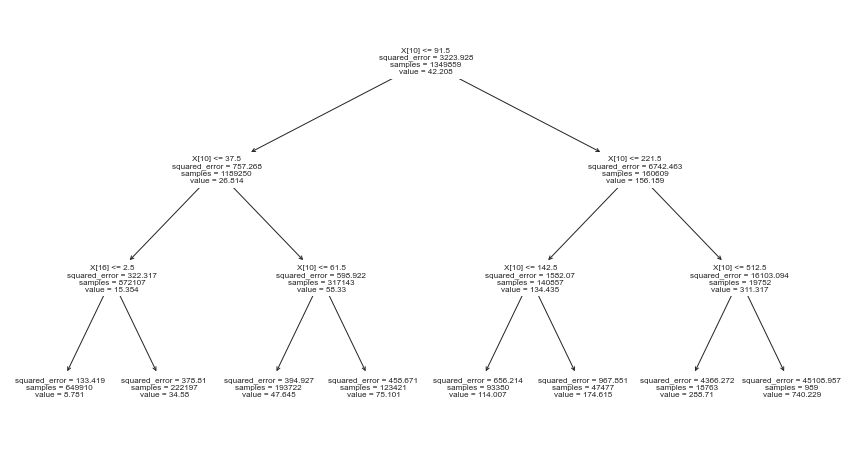

In [19]:
from sklearn import tree

plt.figure(figsize =(15, 8))
tree.plot_tree(model2);

In [20]:
pred2=model2.predict(X_test) # predición

In [21]:
compa2=pd.DataFrame({'Actual':y_test,'Pred-2':pred2})
compa2

,Actual,Pred-2
1251307,6.0,8.780637
4750566,35.0,34.579954
6773048,10.0,8.780637
58354,73.0,47.645291
6648930,49.0,47.645291
...,...,...
4021836,67.0,34.579954
1886023,26.0,34.579954
957007,7.0,8.780637
245859,-4.0,8.780637


<AxesSubplot:>

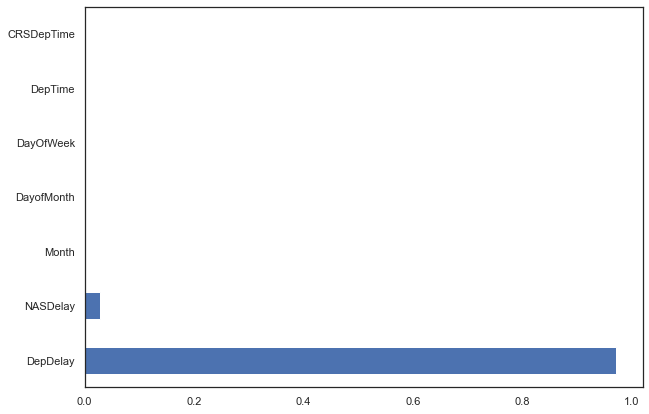

In [22]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model2.feature_importances_, index = X.columns)
feat_importances.nlargest(7).plot(kind='barh')

3 Random Forest**

In [23]:
model3 = RandomForestRegressor(n_estimators = 10, max_depth=10, random_state = 42)
model3.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [24]:
pred3=model3.predict(X_test)  # predicción

In [25]:
compa3=pd.DataFrame({'Actual':y_test,'Pred-3':pred3})
compa3

,Actual,Pred-3
1251307,6.0,3.695323
4750566,35.0,37.349161
6773048,10.0,5.696531
58354,73.0,68.749563
6648930,49.0,49.405453
...,...,...
4021836,67.0,61.962457
1886023,26.0,23.567830
957007,7.0,5.696531
245859,-4.0,-2.541012


<AxesSubplot:>

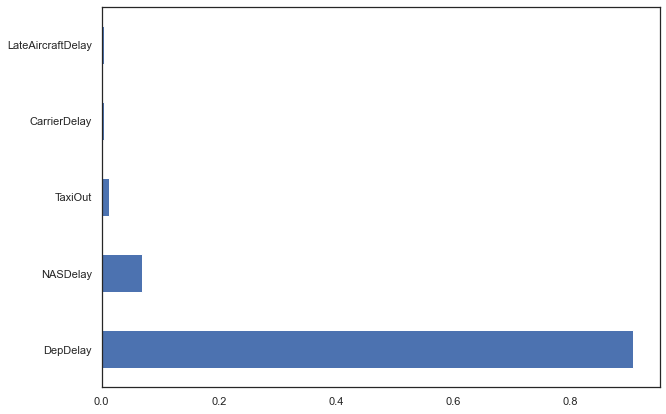

In [26]:

# Importancia de las caracteristicas.
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model3.feature_importances_, index = X.columns)
feat_importances.nlargest(5).plot(kind='barh')

**Ridge** (no realizamos la estandarificación lo haremos luego)

In [27]:
from sklearn.linear_model import Ridge
model4=Ridge()
model4.fit(X_train,y_train)

Ridge()

In [28]:
pred4=model4.predict(X_test) # predicción

In [29]:
compa4=pd.DataFrame({'Actual':y_test,'Pred-4':pred4})
compa4

,Actual,Pred-4
1251307,6.0,6.000001
4750566,35.0,35.000010
6773048,10.0,9.999994
58354,73.0,73.000002
6648930,49.0,48.999997
...,...,...
4021836,67.0,66.999994
1886023,26.0,26.000003
957007,7.0,7.000004
245859,-4.0,-3.999991


**Lasso**

In [30]:
from sklearn.linear_model import Lasso
model5=Lasso(alpha=0.1)
model5.fit(X_train,y_train)

Lasso(alpha=0.1)

In [31]:
pred5=model5.predict(X_test)

In [32]:
compa5=pd.DataFrame({'Actual':y_test,'Pred-5':pred5})
compa5

,Actual,Pred-5
1251307,6.0,6.034770
4750566,35.0,34.913964
6773048,10.0,9.972608
58354,73.0,72.967881
6648930,49.0,48.944035
...,...,...
4021836,67.0,66.958249
1886023,26.0,25.932465
957007,7.0,7.044377
245859,-4.0,-3.797839


***
## Exercici 2
Compara’ls en base al MSE i al R2 .



In [33]:
pred=[pred1,pred2,pred3,pred4,pred5]

medidor=[]

for i in range(len(pred)):
    
    estimador=[r2_score(y_test, pred[i]), mean_squared_error(y_test, pred[i]),mean_absolute_error(y_test, pred[i])]
    medidor.append(estimador)

In [34]:
metricas=pd.DataFrame({'Linear_Regression':medidor[0],'TreeDecision':medidor[1],
                      'RandomForest':medidor[2],'Ridge':medidor[3],'Lasso':medidor[4]},
                    index=['R2_Score','RMSE','MAE'])

metricas

,Linear_Regression,TreeDecision,RandomForest,Ridge,Lasso
R2_Score,1.000000,0.873966,0.985570,1.000000,0.999996
RMSE,0.000005,406.564561,46.547770,0.000005,0.013141
MAE,0.000018,12.763508,4.208832,0.000018,0.077457


Resumen de todas las métricas.

### Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

**Regresión lineal**

In [35]:
#Cambiando parametros
model1_mod = LinearRegression(fit_intercept = False, n_jobs = -1)
model1_mod.fit(X_train,y_train)
pred1_mod=model1_mod.predict(X_test)

In [36]:
compa1_mod=pd.DataFrame({'Actual':y_test,'Pred':pred1,'Pred_mod':pred1_mod})
compa1_mod

,Actual,Pred,Pred_mod
1251307,6.0,6.000001,5.999999
4750566,35.0,35.000010,35.000009
6773048,10.0,9.999994,9.999994
58354,73.0,73.000002,73.000002
6648930,49.0,48.999997,48.999998
...,...,...,...
4021836,67.0,66.999994,66.999992
1886023,26.0,26.000004,26.000002
957007,7.0,7.000004,7.000004
245859,-4.0,-3.999992,-3.999993


Arbol Decisión

In [37]:
model2_mod=DecisionTreeRegressor(max_depth = 10, criterion='friedman_mse', random_state=42)
model2_mod.fit(X_train,y_train)
pred2_mod=model1_mod.predict(X_test)

In [38]:
compa2_mod=pd.DataFrame({'Actual':y_test,'Pred-2':pred2,'Pred2_mod':pred2_mod})
compa2_mod

,Actual,Pred-2,Pred2_mod
1251307,6.0,8.780637,5.999999
4750566,35.0,34.579954,35.000009
6773048,10.0,8.780637,9.999994
58354,73.0,47.645291,73.000002
6648930,49.0,47.645291,48.999998
...,...,...,...
4021836,67.0,34.579954,66.999992
1886023,26.0,34.579954,26.000002
957007,7.0,8.780637,7.000004
245859,-4.0,8.780637,-3.999993


Random Forest

In [39]:
model3_mod = RandomForestRegressor(n_estimators = 100, max_depth=30, random_state = 42) 
model3_mod.fit(X_train,y_train)
pred3_mod=model1_mod.predict(X_test)

In [40]:
compa3_mod=pd.DataFrame({'Actual':y_test,'Pred-3':pred3,'Pred3_mod':pred3_mod})
compa3_mod

,Actual,Pred-3,Pred3_mod
1251307,6.0,3.695323,5.999999
4750566,35.0,37.349161,35.000009
6773048,10.0,5.696531,9.999994
58354,73.0,68.749563,73.000002
6648930,49.0,49.405453,48.999998
...,...,...,...
4021836,67.0,61.962457,66.999992
1886023,26.0,23.567830,26.000002
957007,7.0,5.696531,7.000004
245859,-4.0,-2.541012,-3.999993


Ridge

In [41]:
from sklearn.linear_model import Ridge
model4_mod=Ridge(alpha=1,solver='cholesky')## modificamos parametros
model4_mod.fit(X_train,y_train)
pred4_mod=model1_mod.predict(X_test)

In [42]:
compa4_mod=pd.DataFrame({'Actual':y_test,'Pred-4':pred4,'Pred4_mod':pred4_mod})
compa4_mod

,Actual,Pred-4,Pred4_mod
1251307,6.0,6.000001,5.999999
4750566,35.0,35.000010,35.000009
6773048,10.0,9.999994,9.999994
58354,73.0,73.000002,73.000002
6648930,49.0,48.999997,48.999998
...,...,...,...
4021836,67.0,66.999994,66.999992
1886023,26.0,26.000003,26.000002
957007,7.0,7.000004,7.000004
245859,-4.0,-3.999991,-3.999993


Lasso

In [43]:
from sklearn.linear_model import Lasso
model5_mod=Lasso(alpha=0.15) # modificamos a 0.15
model5_mod.fit(X_train,y_train)
pred5_mod=model1_mod.predict(X_test)

In [44]:
compa5_mod=pd.DataFrame({'Actual':y_test,'Pred-5':pred5,'Pred5_mod':pred5_mod})
compa5_mod

,Actual,Pred-5,Pred5_mod
1251307,6.0,6.034770,5.999999
4750566,35.0,34.913964,35.000009
6773048,10.0,9.972608,9.999994
58354,73.0,72.967881,73.000002
6648930,49.0,48.944035,48.999998
...,...,...,...
4021836,67.0,66.958249,66.999992
1886023,26.0,25.932465,26.000002
957007,7.0,7.044377,7.000004
245859,-4.0,-3.797839,-3.999993


**Metricas:**

In [45]:
pred_mod=[pred1_mod,pred2_mod,pred3_mod,pred4_mod,pred5_mod]

medidor_mod=[]

for i in range(len(pred)):
    
    estimador=[r2_score(y_test, pred_mod[i]), mean_squared_error(y_test, pred_mod[i]),
               mean_absolute_error(y_test, pred_mod[i])]
    medidor_mod.append(estimador)

In [46]:
metricas_mod=pd.DataFrame({'Linear_Regression':medidor_mod[0],'TreeDecision':medidor_mod[1],
                      'RandomForest':medidor_mod[2],'Ridge':medidor_mod[3],'Lasso':medidor_mod[4]},
                    index=['R2_Score','RMSE','MAE'])

metricas_mod

,Linear_Regression,TreeDecision,RandomForest,Ridge,Lasso
R2_Score,1.000000,1.000000,1.000000,1.000000,1.000000
RMSE,0.000005,0.000005,0.000005,0.000005,0.000005
MAE,0.000018,0.000018,0.000018,0.000018,0.000018


In [47]:
print('--------Primeras metricas-------\n')
display(metricas)
print('\n--Metricas parametros modificados--')
display(metricas_mod)

--------Primeras metricas-------



,Linear_Regression,TreeDecision,RandomForest,Ridge,Lasso
R2_Score,1.000000,0.873966,0.985570,1.000000,0.999996
RMSE,0.000005,406.564561,46.547770,0.000005,0.013141
MAE,0.000018,12.763508,4.208832,0.000018,0.077457



--Metricas parametros modificados--


,Linear_Regression,TreeDecision,RandomForest,Ridge,Lasso
R2_Score,1.000000,1.000000,1.000000,1.000000,1.000000
RMSE,0.000005,0.000005,0.000005,0.000005,0.000005
MAE,0.000018,0.000018,0.000018,0.000018,0.000018


***
## Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

**Utilizaremos 'Cross validation' para realizar una nueva comprobación de las metriccas de la regression lineal**
Buscamos detectar overfittig/sobre ajuste

In [48]:
from sklearn.model_selection import cross_val_score
def cross_validation(model,X,y):
    
    '''Realizamos crossvalidation y imprimimos los datos.'''
    
    scores =cross_val_score(model, X,y,scoring='neg_mean_squared_error',cv=10)
    model_rmse_scores=np.sqrt(-scores)
    print(model)
    print('\nScores (RMSE): ',model_rmse_scores)
    print('Mean: ', model_rmse_scores.mean())
    print('Std:  ', model_rmse_scores.std())

In [49]:
cross_validation(model1_mod,X,y)

LinearRegression(fit_intercept=False, n_jobs=-1)

Scores (RMSE):  [6.44070263e-03 4.55415067e-03 3.34289733e-05 3.02030195e-05
 3.30935431e-05 3.89924791e-05 3.80347466e-05 2.98871101e-05
 2.57111333e-05 3.13105906e-05]
Mean:  0.0011255514897413462
Std:   0.002226272754186496


El valor medio que se obtiene de RMSE 0.00112 es superior al obtenido con X train test 0.000005

***
## Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

Primero vamos a comprobar si los atributos son dependientes entre ellos, si hay colinearidad. Ya sabemos que si pero lo mediremos y corregiremos

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif=vif.sort_values(by='VIF',ascending=False)
    

    return(vif)

In [51]:
calc_vif(X)

D:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
9,AirTime,inf
13,TaxiOut,inf
12,TaxiIn,inf
7,ActualElapsedTime,inf
8,CRSElapsedTime,723.552716
10,DepDelay,160.868421
11,Distance,87.973353
3,DepTime,64.185638
4,CRSDepTime,63.946372
18,LateAircraftDelay,58.591364


In [52]:
def regular_vif(df,vif_max):
    
    '''Elimina las columnas con VIF superior a 10,
    Calculando una a una'''
    vif_max=11
    columnas_eliminadas=[]
    while vif_max>10:
        vif = pd.DataFrame()
        vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["variables"] = df.columns
        vif=vif.sort_values(by='VIF',ascending=False)

        vif_max=vif.VIF.max()
        columnas_eliminadas.append(vif.variables.iloc[0])
    
        df.drop(columns=[vif.variables.iloc[0]],inplace=True)
    print(columnas_eliminadas)
    return (vif)

In [53]:
X.AirTime.describe()

count    1.928371e+06
mean     1.082771e+02
std      6.864261e+01
min      0.000000e+00
25%      5.800000e+01
50%      9.000000e+01
75%      1.370000e+02
max      1.091000e+03
Name: AirTime, dtype: float64

In [54]:
calc_vif(X)

D:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
9,AirTime,inf
13,TaxiOut,inf
12,TaxiIn,inf
7,ActualElapsedTime,inf
8,CRSElapsedTime,723.552716
10,DepDelay,160.868421
11,Distance,87.973353
3,DepTime,64.185638
4,CRSDepTime,63.946372
18,LateAircraftDelay,58.591364


La alerta nos indica que algunos caso r-cuadrado es igual a 1. Serán las primeras columnas que eliminaremo.


In [70]:
X_fea= X.copy()
X_fea.drop(columns=['AirTime'],inplace=True)

In [71]:
calc_vif(X_fea)

,variables,VIF
7,ActualElapsedTime,746.002115
8,CRSElapsedTime,723.620141
9,DepDelay,160.869478
10,Distance,87.974291
3,DepTime,64.186244
4,CRSDepTime,63.946636
17,LateAircraftDelay,58.591733
13,CarrierDelay,54.061551
6,CRSArrTime,38.716135
15,NASDelay,31.937536


In [72]:
def regular_vif(df,vif_max):
    vif_max=11
    columnas_eliminadas=[]
    while vif_max>10:
        vif = pd.DataFrame()
        vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["variables"] = df.columns
        vif=vif.sort_values(by='VIF',ascending=False)

        vif_max=vif.VIF.max()
        columnas_eliminadas.append(vif.variables.iloc[0])
    
        df.drop(columns=[vif.variables.iloc[0]],inplace=True)
    print(columnas_eliminadas)
    return (vif)

In [73]:
regular_vif(X_fea,11)

['ActualElapsedTime', 'CRSElapsedTime', 'DepTime', 'DepDelay', 'CRSArrTime', 'CRSDepTime', 'ArrTime']


,VIF,variables
3,6.244268,ArrTime
2,4.240426,DayOfWeek
1,3.758156,DayofMonth
0,3.654149,Month
6,3.163536,TaxiOut
5,2.749504,TaxiIn
4,2.645993,Distance
9,1.515096,NASDelay
11,1.315040,LateAircraftDelay
7,1.155246,CarrierDelay


In [74]:
X_fea.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

Estas son las columnas que eliminaremos, añadimos 'DepDelay', ya que la eliminaremos en el ejercicio 6.

In [75]:
X_fea['DepDelay']=X['DepDelay']

In [76]:
X_fea.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepDelay'],
      dtype='object')

- Definimos test y train

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X_fea, y, test_size=0.3, random_state=42)

- Realizamos un standard scaler que podremos utilizar después.

In [78]:
scaler = StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

* Transformación polinomial

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)


### regresion lineal

In [80]:
# entrenamos el model1(LR)con X con las caracteriticas reducidas
model1.fit(X_train,y_train)
pred1_fea=model1.predict(X_test)
# entrenamos el modelo con la transformación polinomial
model1.fit(X_train_poly,y_train)
pred1_poly=model1.predict(X_test_poly)

# Entrenamos el modelo con  datos Standarificados
model1.fit(X_train_std,y_train)
pred1_std=model1.predict(X_test_std)


In [81]:
pred_fea=[pred1,pred1_fea,pred1_poly,pred1_std]

medidor_fea=[]

for i in range(len(pred_fea)):
    
    estimador=[r2_score(y_test, pred_fea[i]), mean_squared_error(y_test, pred_fea[i]),
               mean_absolute_error(y_test, pred_fea[i])]
    medidor_fea.append(estimador)

In [82]:
metricas_fea=pd.DataFrame({'Primera predicción':medidor_fea[0],'Columnas eliminadas':medidor_fea[1],
                      'Polinomio':medidor_fea[2],'Std':medidor_fea[3]},
                    index=['R2_Score','RMSE','MAE'])

print('Regresion lineal')
display(metricas_fea)

Regresion lineal


,Primera predicción,Columnas eliminadas,Polinomio,Std
R2_Score,1.000000,0.990069,0.990893,0.990069
RMSE,0.000005,32.035468,29.378680,32.035468
MAE,0.000018,3.984423,3.691164,3.984423


In [83]:
#prediccion con  statsmodel
X1=np.array(X_test)
y1=np.array(y_test)
import statsmodels.api as sm
X_addC = sm.add_constant(X1)
result = sm.OLS(y1, X_addC).fit()
print(result.rsquared, result.rsquared_adj)
result.summary()

0.9900694949695283 0.990069288977711


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.806e+06
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:54:26   Log-Likelihood:            -1.8237e+06
No. Observations:              578512   AIC:                         3.647e+06
Df Residuals:                  578499   BIC:                         3.648e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4468      0.031   -177.230      0.000      -5.507      -5.387
x1            -0.0453      0.002    -21.169      0.000      -0.050      -0.041
x2            -0.0018      0.001     -2.172      0.030      -0.004      -0.000
x3            -0.0101      0.004     -2.706      0.007      -0.017      -0.003
x4            -0.0019   1.31e-05   -146.464      0.000      -0.002      -0.002
x5             0.1402      0.002     92.513      0.000       0.137       0.143
x6             0.1229      0.001    162.070      0.000       0.121       0.124
x7             0.9249      0.001   1229.043      0.000       0.923       0.926
x8             0.9178      0.001   1110.376      0.000       0.916       0.919
x9             0.9279      0.001   1308.995      0.000       0.927       0.929
x10            0.9882      0.005    207.346      0.000       0.979       0.998
x11            0.9253      0.001   1217.884      0.000       0.924       0.927
x12            0.1036      0.001    145.752      0.000       0.102       0.105
==============================================================================
Omnibus:                   269014.638   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1656399.975
Skew:                          -2.184   Prob(JB):                         0.00
Kurtosis:                      10.045   Cond. No.                     3.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Random forest**

In [84]:
model3.fit(X_train,y_train)
pred3_fea=model3.predict(X_test)
# entrenamos el modelo con la transformación polinomial
model3.fit(X_train_poly,y_train)
pred3_poly=model3.predict(X_test_poly)

# Entrenamos el modelo con  datos Standarificados
model3.fit(X_train_std,y_train)
pred3_std=model3.predict(X_test_std)


In [85]:
pred_fea=[pred3,pred3_fea,pred3_poly,pred3_std]

medidor_fea=[]

for i in range(len(pred_fea)):
    
    estimador=[r2_score(y_test, pred_fea[i]), mean_squared_error(y_test, pred_fea[i]),
               mean_absolute_error(y_test, pred_fea[i])]
    medidor_fea.append(estimador)

In [86]:
metricas_fea_rf=pd.DataFrame({'Primera predicción':medidor_fea[0],'Columnas eliminadas':medidor_fea[1],
                      'Polinomio':medidor_fea[2],'Std':medidor_fea[3]},
                    index=['R2_Score','RMSE','MAE'])

print('Random Forest')
display(metricas_fea)

Random Forest


,Primera predicción,Columnas eliminadas,Polinomio,Std
R2_Score,1.000000,0.990069,0.990893,0.990069
RMSE,0.000005,32.035468,29.378680,32.035468
MAE,0.000018,3.984423,3.691164,3.984423


**ridge**

In [87]:
model4.fit(X_train,y_train)
pred4_fea=model4.predict(X_test)
# entrenamos el modelo con la transformación polinomial
model4.fit(X_train_poly,y_train)
pred4_poly=model4.predict(X_test_poly)

# Entrenamos el modelo con  datos Standarificados
model4.fit(X_train_std,y_train)
pred4_std=model4.predict(X_test_std)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.20072e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [88]:
pred_fea=[pred4,pred4_fea,pred4_poly,pred4_std]

medidor_fea=[]

for i in range(len(pred_fea)):
    
    estimador=[r2_score(y_test, pred_fea[i]), mean_squared_error(y_test, pred_fea[i]),
               mean_absolute_error(y_test, pred_fea[i])]
    medidor_fea.append(estimador)

In [89]:
metricas_fea_rd=pd.DataFrame({'Primera predicción':medidor_fea[0],'Columnas eliminadas':medidor_fea[1],
                      'Polinomio':medidor_fea[2],'Std':medidor_fea[3]},
                    index=['R2_Score','RMSE','MAE'])

print('Ridge')
display(metricas_fea)

Ridge


,Primera predicción,Columnas eliminadas,Polinomio,Std
R2_Score,1.000000,0.990069,0.990893,0.990069
RMSE,0.000005,32.035468,29.378680,32.035468
MAE,0.000018,3.984423,3.691164,3.984423


***
### Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions

In [90]:
X_fin=X_fea.drop(columns=['DepDelay'])
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [91]:
#Linear Regression
model1.fit(X_train_std,y_train)
pred1_fin=model1.predict(X_test_std)
# randomforest
model3.fit(X_train_std,y_train)
pred3_fin=model3.predict(X_test_std)
#ride
model4.fit(X_train_std,y_train)
pred4_fin=model3.predict(X_test_std)

In [92]:
pred_fin=[pred1_fin,pred3_fin,pred4_fin]

medidor_fin=[]

for i in range(len(pred_fea)):
    
    estimador=[r2_score(y_test, pred_fea[i]), mean_squared_error(y_test, pred_fea[i]),
               mean_absolute_error(y_test, pred_fea[i])]
    medidor_fin.append(estimador)
    

In [93]:
metricas_fin=pd.DataFrame({'Regresión Linear':medidor_fin[0],'Random Forest':medidor_fin[1],
                      'Ridge':medidor_fin[3]},
                    index=['R2_Score','RMSE','MAE'])

print('\n--Metricas parametros modificados--')
display(metricas_mod)
print('Eliminando DepDelay')
display(metricas_fin)


--Metricas parametros modificados--


,Linear_Regression,TreeDecision,RandomForest,Ridge,Lasso
R2_Score,1.000000,1.000000,1.000000,1.000000,1.000000
RMSE,0.000005,0.000005,0.000005,0.000005,0.000005
MAE,0.000018,0.000018,0.000018,0.000018,0.000018


Eliminando DepDelay


,Regresión Linear,Random Forest,Ridge
R2_Score,1.000000,0.990069,0.990069
RMSE,0.000005,32.035468,32.035470
MAE,0.000018,3.984423,3.984421


***